# Interactive Graphs

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#df=pd.read_csv('Capstone_Data.csv',parse_dates=[5])
df=pd.read_csv('Capstone_Data.csv')

### here colum Date is in Object

In [3]:
df.dtypes

User_ID                     int64
Cardholder_Name            object
Description                object
Amount                    float64
Vendor                     object
Date                       object
Merchant_Category_Code     object
Month                      object
dtype: object

In [4]:
df.head()

,User_ID,Cardholder_Name,Description,Amount,Vendor,Date,Merchant_Category_Code,Month
0,1024,AARON,GENERAL PURCHASE,235.0,PBD IIA INTRNLAUDITORS,21/1/2014,"BOOKS, PERIODICALS AND NEWSPAPERS",Jan
1,1024,AARON,GENERAL PURCHASE,890.0,FINANCIAL ACCOUNTING F,2/4/2014,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,Apr
2,1024,AARON,GENERAL PURCHASE,265.0,PBD IIA INTRNLAUDITORS,19/5/2014,"BOOKS, PERIODICALS AND NEWSPAPERS",May
3,85424,Abbott,GENERAL PURCHASE,390.0,COLLEGEBOARD PRODUCTS,29/7/2013,SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE...,Jul
4,85424,Abbott,AIR TRAVEL,297.6,DELTA AIR 0062335020780,7/5/2013,DELTA,May


### Converting and cleaning Date column

In [5]:
#df['Dateq']=pd.to_datetime(df['Date'])

In [307]:
#ww=datetime.strptime('21/1/2014','%d/%m/%Y')
##datetime.strptime(df['Date'],'%d/%m/%Y')

In [6]:
#pd.to_datetime(ww)

In [7]:
cleaned_date=[]
for i in df['Date']:
    cleaned=datetime.strptime(i,'%d/%m/%Y').date()
    cleaned=cleaned.strftime("%d-%m-%Y")
    cleaned_date.append(cleaned)


In [8]:
df['Date']=(cleaned_date)
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
#df['Month']=pd.to_datetime(df['Month'], format='%b')

In [9]:
#df['Month']=df['Month'].apply(lambda x: x.strftime('%B'))   
df['Year_month']=df['Date'].apply(lambda x: x.strftime('%b-%y'))   
df['Month']=df['Date'].apply(lambda x: x.strftime('%B'))   

In [10]:
df.dtypes

User_ID                            int64
Cardholder_Name                   object
Description                       object
Amount                           float64
Vendor                            object
Date                      datetime64[ns]
Merchant_Category_Code            object
Month                             object
Year_month                        object
dtype: object

In [11]:
df.head()

,User_ID,Cardholder_Name,Description,Amount,Vendor,Date,Merchant_Category_Code,Month,Year_month
0,1024,AARON,GENERAL PURCHASE,235.0,PBD IIA INTRNLAUDITORS,2014-01-21,"BOOKS, PERIODICALS AND NEWSPAPERS",January,Jan-14
1,1024,AARON,GENERAL PURCHASE,890.0,FINANCIAL ACCOUNTING F,2014-04-02,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,April,Apr-14
2,1024,AARON,GENERAL PURCHASE,265.0,PBD IIA INTRNLAUDITORS,2014-05-19,"BOOKS, PERIODICALS AND NEWSPAPERS",May,May-14
3,85424,Abbott,GENERAL PURCHASE,390.0,COLLEGEBOARD PRODUCTS,2013-07-29,SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE...,July,Jul-13
4,85424,Abbott,AIR TRAVEL,297.6,DELTA AIR 0062335020780,2013-05-07,DELTA,May,May-13


In [22]:
#pd.DatetimeIndex(df['Date']).month
#df['month'] = df['Date'].dt.month
#i was getting only numbers

In [12]:
df[:2]

,User_ID,Cardholder_Name,Description,Amount,Vendor,Date,Merchant_Category_Code,Month,Year_month
0,1024,AARON,GENERAL PURCHASE,235.0,PBD IIA INTRNLAUDITORS,2014-01-21,"BOOKS, PERIODICALS AND NEWSPAPERS",January,Jan-14
1,1024,AARON,GENERAL PURCHASE,890.0,FINANCIAL ACCOUNTING F,2014-04-02,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,April,Apr-14


### ADKINS is not equal to Adkin, that why i converted column 1 to lower case 

In [13]:
#This is the problem
df[df.Cardholder_Name=='ADKINS']

,User_ID,Cardholder_Name,Description,Amount,Vendor,Date,Merchant_Category_Code,Month,Year_month
1483,85928,ADKINS,SHARPWRITER MECH PEN DZ,11.86,OFFICEMAX CT IN#357326,2014-06-13,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",June,Jun-14


In [14]:
df['Cardholder_Name']=df['Cardholder_Name'].str.lower()

In [15]:
df[df.Cardholder_Name=='adkins'].sum()

User_ID    4554184.00
Amount       23604.53
dtype: float64

# Cardhonders Amount: Graph 1

In [16]:
cardholder=df.groupby('Cardholder_Name').sum()

In [17]:
cardholder=cardholder.reset_index()

In [18]:
cardholder=cardholder.drop('User_ID',axis=1)

In [19]:
cardholder.head()

,Cardholder_Name,Amount
0,aaron,1390.00
1,abbott,47931.25
2,abdolvand,7462.99
3,abernathy,31778.72
4,abid,57.45


In [20]:
%matplotlib inline

In [131]:
#cardholder.boxplot(column='Amount', by = 'Cardholder_Name')

In [55]:
#cardholder.plot(kind='bar')

In [118]:
import plotly.plotly as py
import plotly.graph_objs as go
#Setting plotly credentials
#mantejsingh account
##py.sign_in('mantejsingh','hQnYIqbxnsuRvQxkVFVW')
#NJIT account
py.sign_in('mhd9','a7aJsSJEwfTNiZqqCBwS')

In [24]:
data = [go.Scatter(x=cardholder['Cardholder_Name'],y=cardholder['Amount'],name='Cardholder\'s Amount')]

In [80]:
layout = go.Layout(
title='<b>CardHolder\'s Amount</b>',
xaxis=dict(title='Amount_Frequency'),
yaxis=dict(title='Count')
)

In [81]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='InteractiveGraph_1')

In [27]:
df.head()

,User_ID,Cardholder_Name,Description,Amount,Vendor,Date,Merchant_Category_Code,Month,Year_month
0,1024,aaron,GENERAL PURCHASE,235.0,PBD IIA INTRNLAUDITORS,2014-01-21,"BOOKS, PERIODICALS AND NEWSPAPERS",January,Jan-14
1,1024,aaron,GENERAL PURCHASE,890.0,FINANCIAL ACCOUNTING F,2014-04-02,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,April,Apr-14
2,1024,aaron,GENERAL PURCHASE,265.0,PBD IIA INTRNLAUDITORS,2014-05-19,"BOOKS, PERIODICALS AND NEWSPAPERS",May,May-14
3,85424,abbott,GENERAL PURCHASE,390.0,COLLEGEBOARD PRODUCTS,2013-07-29,SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE...,July,Jul-13
4,85424,abbott,AIR TRAVEL,297.6,DELTA AIR 0062335020780,2013-05-07,DELTA,May,May-13


# Monthly Transactions: Graph 2

In [42]:
mnttrans=df.groupby('Month').sum()

In [43]:
mnttrans[:2]

,User_ID,Amount
Month,,
April,367422143,4269221.76
August,392972413,4077548.11


In [44]:
mnttrans=mnttrans.reset_index()

mnttrans=mnttrans.drop('User_ID',axis=1)

In [45]:
mnttrans.dtypes

Month      object
Amount    float64
dtype: object

In [48]:
#convert Month to datytype format
mnttrans['Month']=pd.to_datetime(mnttrans['Month'], format='%B')

In [49]:
mnttrans[:]

,Month,Amount
0,1900-04-01,4269221.76
1,1900-08-01,4077548.11
2,1900-12-01,3164084.60
3,1900-02-01,4151240.48
4,1900-01-01,4086562.95
5,1900-07-01,3345432.68
6,1900-06-01,3721530.33
7,1900-03-01,5068879.20
8,1900-05-01,3135951.55
9,1900-11-01,3376869.48


In [50]:
#Sorting...Jan to Decemnber Accending
mnttrans=mnttrans.sort_values(by='Month',ascending=True)

In [51]:
#Converting back to whole month
mnttrans['Month']=mnttrans['Month'].apply(lambda x: x.strftime('%B')) 

In [52]:
#mnttrans=mnttrans.reset_index()
mnttrans

,Month,Amount
4,January,4086562.95
3,February,4151240.48
7,March,5068879.20
0,April,4269221.76
8,May,3135951.55
6,June,3721530.33
5,July,3345432.68
1,August,4077548.11
11,September,3884649.06
10,October,5332229.64


In [79]:
data = [go.Scatter(x=mnttrans['Month'],y=mnttrans['Amount'])]
layout = go.Layout(
title='<b>Monthly Transactions</b>',
xaxis=dict(title='Months'),
yaxis=dict(title='Amounts')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='InteractiveGraph_2')

In [114]:
Line_graph = go.Scatter(
    x=mnttrans['Month'],
    y=mnttrans['Amount'],
    name='Line Graph'
)
Bar_plot = go.Bar(
    x=mnttrans['Month'],
    y=mnttrans['Amount'],
    name='Bar Graph',
    marker=dict(color='green',line=dict(width=2)),
    opacity=0.6
)

layout = go.Layout(
title='<b>Multi Axis Graph</b>',
xaxis=dict(title='Months'),
yaxis=dict(title='Amounts')
)

data = [Line_graph, Bar_plot]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-line Multi_axis Graph')

# Card Counts: Graph 3

In [54]:
df.head()

,User_ID,Cardholder_Name,Description,Amount,Vendor,Date,Merchant_Category_Code,Month,Year_month
0,1024,aaron,GENERAL PURCHASE,235.0,PBD IIA INTRNLAUDITORS,2014-01-21,"BOOKS, PERIODICALS AND NEWSPAPERS",January,Jan-14
1,1024,aaron,GENERAL PURCHASE,890.0,FINANCIAL ACCOUNTING F,2014-04-02,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,April,Apr-14
2,1024,aaron,GENERAL PURCHASE,265.0,PBD IIA INTRNLAUDITORS,2014-05-19,"BOOKS, PERIODICALS AND NEWSPAPERS",May,May-14
3,85424,abbott,GENERAL PURCHASE,390.0,COLLEGEBOARD PRODUCTS,2013-07-29,SCHOOLS AND EDUCATIONAL SERVICES NOT ELSEWHERE...,July,Jul-13
4,85424,abbott,AIR TRAVEL,297.6,DELTA AIR 0062335020780,2013-05-07,DELTA,May,May-13


In [62]:
cardcount=df.groupby('Cardholder_Name').Vendor.count()

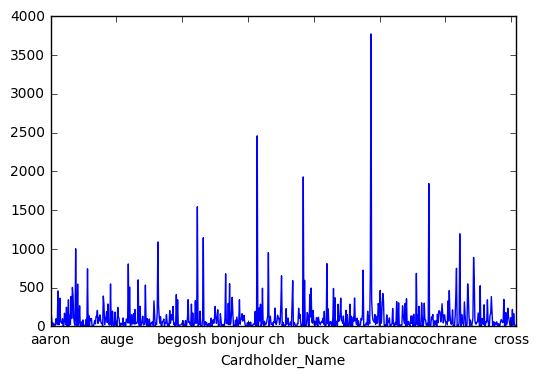

In [68]:
cardcount.plot()

In [120]:
data = [go.Scatter(
        x=cardholder['Cardholder_Name'],
        y=cardcount,
        mode = 'markers',
        name = 'lines+markers',
        line = dict(
        #color = ('Black'),
        width = 6
        #dash = 'spline'
        )
           
    )
       
       ]
layout = go.Layout(
title='<b>Number Of Transactions</b>',
xaxis=dict(title='CardHolders Name',color = ('Black')),
yaxis=dict(title='Counts',color = ('Black'))
#fillcolor='rgba(0,100,80,0.2)'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='InteractiveGraph_3')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mhd9/0 or inside your plot.ly account where it is named 'InteractiveGraph_3'
